In [216]:
import pandas as pd
import scipy as sc
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sb


Loading and cleaning the Elections data into 8 different Dataframes:

In [217]:
knesset21elections = pd.read_excel(r"Knesset Elections\-21-.xlsx")
knesset21elections = knesset21elections.drop("מספר קלפי", axis=1)
knesset21elections = knesset21elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()


knesset20elections = pd.read_excel(r"Knesset Elections\-20-.xlsx")
knesset20elections = knesset20elections.drop("מספר קלפי", axis=1)
knesset20elections = knesset20elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()

knesset19elections = pd.read_excel(r"Knesset Elections\-19-.xlsx")
knesset19elections = knesset19elections.drop("מספר קלפי", axis=1)
knesset19elections = knesset19elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()

knesset18elections = pd.read_excel(r"Knesset Elections\-18-.xlsx")
knesset18elections = knesset18elections.drop("סמל קלפי", axis=1)
knesset18elections = knesset18elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()

knesset17elections = pd.read_excel(r"Knesset Elections\-17-2006.xls")
knesset17elections = knesset17elections.drop("מספר קלפי", axis=1)
knesset17elections = knesset17elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()


knesset16elections = pd.read_excel(r"Knesset Elections\-16-2003.xls")
knesset16elections = knesset16elections.drop("סמל קלפי", axis=1)
knesset16elections = knesset16elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()


knesset15elections = pd.read_excel(r"Knesset Elections\-15-1999-.xls")
knesset15elections = knesset15elections.drop("מס' רץ", axis=1).drop("קלפי", axis=1).drop("פיצול", axis=1).drop("נפה", axis=1)
knesset15elections = knesset15elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()


knesset14elections = pd.read_excel(r"Knesset Elections\-14-1996-.xls")
knesset14elections = knesset14elections.drop("סמל קלפי", axis=1).drop("כתובת", axis=1).drop("פיצול", axis=1)
knesset14elections = knesset14elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()

In [219]:
def totalSum(electionDataframe):
    return electionDataframe["Arabs"] + electionDataframe["Center"] + electionDataframe["Left"] + electionDataframe["Right"] + electionDataframe["Orthodox"]

def classified_summed_votes_list(electionsDataframe):
    return [electionsDataframe["Arabs"].sum(), electionsDataframe["Center"].sum(), electionsDataframe["Left"].sum(), electionsDataframe["Right"].sum(), electionsDataframe["Orthodox"].sum()]

def divideParties_into5classess(electionDataframe):
    arabs = []
    orthodox = []
    right = []
    left = []
    center = []
    
    if(electionDataframe.columns.contains("דעם")):
        arabs += ["דעם"]
    if(electionDataframe.columns.contains("ודעם")):
        arabs += ["ודעם"] 
    if(electionDataframe.columns.contains("עם")):
        arabs += ["עם"]
    if(electionDataframe.columns.contains("ום")):
        arabs += ["ום"]
    if(electionDataframe.columns.contains("ע")):
        arabs += ["ע"]
    if(electionDataframe.columns.contains("ו")):
        arabs += ["ו"]
    if(electionDataframe.columns.contains("ד")):
        arabs += ["ד"]
        
    if(electionDataframe.columns.contains("שס")):
        orthodox += ["שס"]
    if(electionDataframe.columns.contains("ג")):
        orthodox += ["ג"]

    if(electionDataframe.columns.contains("מחל")):
        right += ["מחל"]
    if(electionDataframe.columns.contains("ל")):
        right += ["ל"]
    if(electionDataframe.columns.contains("טב")):
        right += ["טב"]
    if(electionDataframe.columns.contains("כ")):
        right += ["כ"]
    if(electionDataframe.columns.contains("ט")):
        right += ["ט"]
    if(electionDataframe.columns.contains("ב")):
        right += ["ב"]        
    if(electionDataframe.columns.contains("יט")):
        right += ["יט"]        
           
    if(electionDataframe.columns.contains("אמת")):
        left += ["אמת"]
    if(electionDataframe.columns.contains("מרצ")):
        left += ["מרצ"]
    if(electionDataframe.columns.contains("מרץ")):
        left += ["מרץ"]
    if(electionDataframe.columns.contains("צפ")):
        left += ["צפ"]
    if(electionDataframe.columns.contains("ם")):
        left += ["ם"]
    if(electionDataframe.columns.contains("זך")):
        left += ["זך"]
                   
    if(electionDataframe.columns.contains("כן")):
        center += ["כן"]
    if(electionDataframe.columns.contains("פה")):
        center += ["פה"]
    if(electionDataframe.columns.contains("הד")):
        center += ["הד"]
    if(electionDataframe.columns.contains("יש")):
        center += ["יש"]
        
    electionDataframe["Arabs"] = 0
    for party_name in arabs:
        electionDataframe["Arabs"] += electionDataframe[party_name]
    
    electionDataframe["Left"] = 0
    for party_name in left:
        electionDataframe["Left"] += electionDataframe[party_name]
    
    electionDataframe["Right"] = 0
    for party_name in right:
        electionDataframe["Right"] += electionDataframe[party_name]
    
    electionDataframe["Center"] = 0
    for party_name in center:
        electionDataframe["Center"] += electionDataframe[party_name]
    
    electionDataframe["Orthodox"] = 0
    for party_name in orthodox:
        electionDataframe["Orthodox"] += electionDataframe[party_name]
    
    afterclassifiying = totalSum(electionDataframe)
    lost_votes = electionDataframe["כשרים"].sum() - afterclassifiying.sum() 
    print("lost votes: ",lost_votes)
    print(arabs,center,left,right,orthodox)
    cols_to_drop = np.arange(4,len(electionDataframe.columns)-5)
    
    return electionDataframe.drop(electionDataframe.columns[cols_to_drop], axis=1)

 


    
    
ahuzey_hatzbaa21 = (knesset21elections["מצביעים"].sum() / knesset21elections["בזב"].sum())#.sort_values(ascending=False)

ahuzey_hatzbaa21

0.6846117554867093

In [220]:

#=============  21 ====================

knesset21elections = divideParties_into5classess(knesset21elections)

#=============  20 ====================

knesset20elections = divideParties_into5classess(knesset20elections)

#============= 19 ===========================

knesset19elections = divideParties_into5classess(knesset19elections)

#============= 18 ===========================

knesset18elections = divideParties_into5classess(knesset18elections)

#============= 17 ===========================

knesset17elections = divideParties_into5classess(knesset17elections)

#============= 16 ===========================

knesset16elections = divideParties_into5classess(knesset16elections)

#============= 15 ===========================

knesset15elections = divideParties_into5classess(knesset15elections)

#============= 14 ===========================

knesset14elections = divideParties_into5classess(knesset14elections)


lost votes:  365800
['דעם', 'ום'] ['פה'] ['אמת', 'מרצ', 'זך'] ['מחל', 'ל', 'טב', 'כ'] ['שס', 'ג']
lost votes:  184974
['ודעם', 'ע'] ['פה'] ['אמת', 'מרצ', 'זך'] ['מחל', 'ל', 'טב', 'כ'] ['שס', 'ג']
lost votes:  262820
['עם', 'ו', 'ד'] ['כן', 'פה'] ['אמת', 'מרץ', 'צפ', 'זך'] ['מחל', 'טב'] ['שס', 'ג']
lost votes:  86333
['עם', 'ו', 'ד'] ['כן'] ['אמת', 'מרצ', 'זך'] ['מחל', 'ל', 'ט', 'ב'] ['שס', 'ג']
lost votes:  153189
['עם', 'ו', 'ד'] ['כן', 'יש'] ['אמת', 'מרצ', 'זך'] ['מחל', 'ל', 'טב', 'כ'] ['שס', 'ג']
lost votes:  128495.0
['עם', 'ו', 'ד'] ['כן', 'פה', 'יש'] ['אמת', 'מרצ', 'ם', 'זך'] ['מחל', 'ל', 'ט', 'ב'] ['שס', 'ג']
lost votes:  169639
['עם', 'ו', 'ד'] ['כן', 'פה', 'הד', 'יש'] ['אמת', 'מרצ', 'ם', 'זך'] ['מחל', 'ל', 'ב', 'יט'] ['שס', 'ג']
lost votes:  75757
['ע', 'ו', 'ד'] ['כן', 'הד'] ['אמת', 'מרץ'] ['מחל', 'ט', 'ב'] ['שס', 'ג']


In [223]:
knesset21elections

,,בזב,מצביעים,פסולים,כשרים,Arabs,Left,Right,Center,Orthodox
שם ישוב,סמל ישוב,,,,,,,,,
אבו ג'ווייעד (שבט),967,1915,275,5,270,188,15,3,50,0
אבו גוש,472,4707,1915,72,1843,858,348,236,334,32
אבו סנאן,473,9234,4845,82,4763,2744,248,844,701,68
אבו עבדון (שבט),958,138,12,0,12,5,5,0,0,0
אבו קורינאת (שבט),968,2927,640,11,629,467,30,14,91,2
אבו קרינאת (יישוב),1342,543,213,4,209,106,15,4,78,2
אבו רובייעה (שבט),966,3919,761,8,753,587,55,11,64,4
אבו רוקייק (שבט),961,4691,1129,13,1116,1025,30,11,26,6
אבו תלול,1375,867,390,4,386,365,5,5,5,1


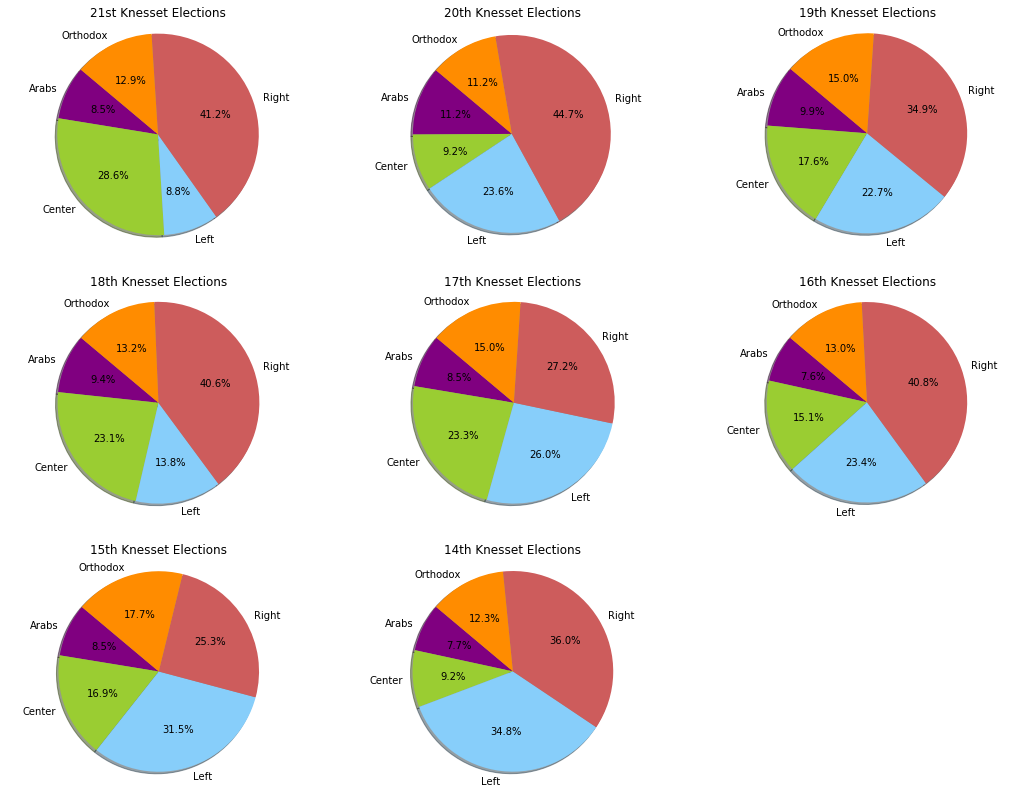

In [224]:

labels = "Arabs", "Center", "Left", "Right" , "Orthodox";
colors = ['purple', "yellowgreen" , "lightskyblue", 'indianred', "darkorange" ]

sizes21 = classified_summed_votes_list(knesset21elections)
sizes20 = classified_summed_votes_list(knesset20elections)
sizes19 = classified_summed_votes_list(knesset19elections)
sizes18 = classified_summed_votes_list(knesset18elections)
sizes17 = classified_summed_votes_list(knesset17elections)
sizes16 = classified_summed_votes_list(knesset16elections)
sizes15 = classified_summed_votes_list(knesset15elections)
sizes14 = classified_summed_votes_list(knesset14elections)
 
    
fig = plt.figure(figsize=(18,14))

# Plot 21st Elections
ax1 = plt.subplot(3,3,1)
ax1.pie(sizes21, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title('21st Knesset Elections')
ax1.axis('equal')

# Plot 20th Elections
ax2 = plt.subplot(3,3,2)
ax2.pie(sizes20, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title('20th Knesset Elections')
ax2.axis('equal')

# Plot 19th Elections
ax3 = plt.subplot(3,3,3)
ax3.pie(sizes19, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax3.set_title('19th Knesset Elections')
ax3.axis('equal')

# Plot 18th Elections
ax4 = plt.subplot(3,3,4)
ax4.pie(sizes18, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax4.set_title('18th Knesset Elections')
ax4.axis('equal')

# Plot 17th Elections
ax4 = plt.subplot(3,3,5)
ax4.pie(sizes17, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax4.set_title('17th Knesset Elections')
ax4.axis('equal')

# Plot 16th Elections
ax4 = plt.subplot(3,3,6)
ax4.pie(sizes16, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax4.set_title('16th Knesset Elections')
ax4.axis('equal')

# Plot 15th Elections
ax4 = plt.subplot(3,3,7)
ax4.pie(sizes15, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax4.set_title('15th Knesset Elections')
ax4.axis('equal')

# Plot 14th Elections
ax4 = plt.subplot(3,3,8)
ax4.pie(sizes14, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax4.set_title('14th Knesset Elections')
ax4.axis('equal')
plt.show()

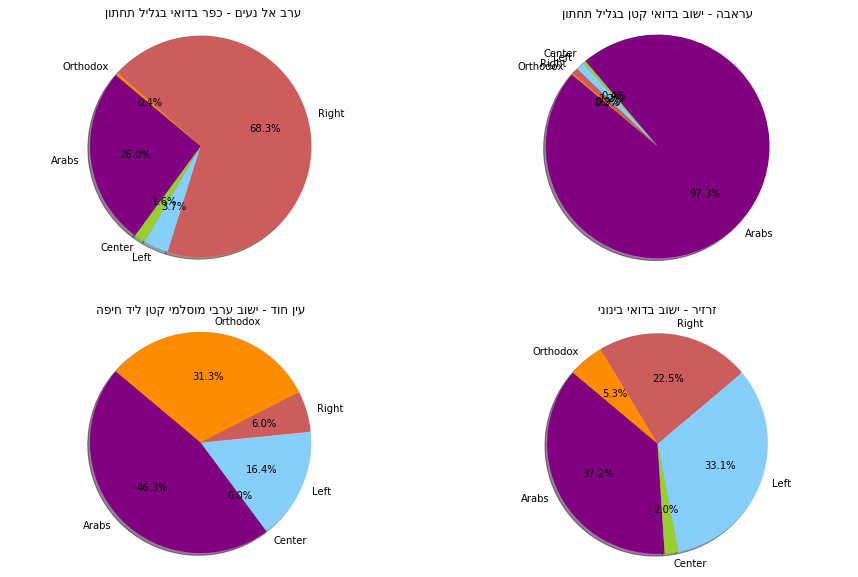

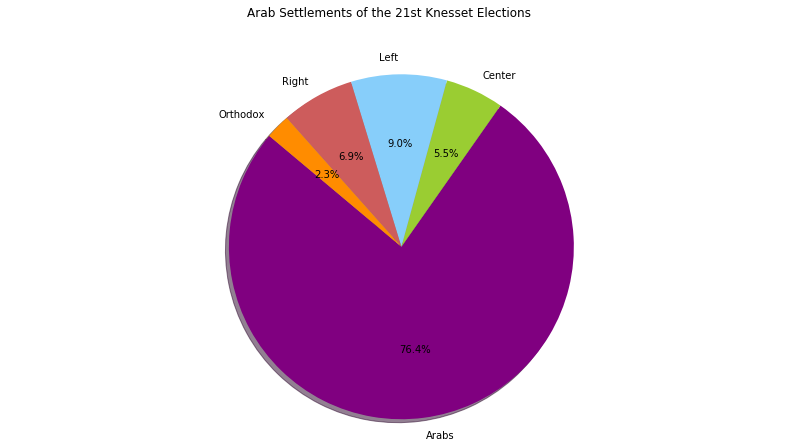

שם ישוב              סמל ישוב
עראבה                531         0.968074
מסעודין אל-עזאזמה    939         0.963215
כאוכב אבו אל-היג'א   505         0.960421
סח'נין               7500        0.946070
אבו תלול             1375        0.945596
שגב-שלום             1286        0.944472
משהד                 520         0.937617
ביר הדאג'            1348        0.935673
טמרה (יזרעאל)        547         0.931034
ערערה-בנגב           1192        0.927716
כאבול                504         0.921897
אום אל-פחם           2710        0.920106
אבו רוקייק (שבט)     961         0.918459
דבוריה               489         0.915467
מג'ד אל-כרום         516         0.912463
הוואשלה (שבט)        1169        0.909836
אכסאל                478         0.900978
אעצם (שבט)           963         0.900318
טייבה                2730        0.892498
עין מאהל             532         0.890994
דייר חנא             492         0.886895
נצאצרה (שבט)         1041        0.881720
רהט                  1161        0.879576
קלנס

In [275]:
fig = plt.figure(figsize=(15,10))

ax1 = plt.subplot(2,2,1)
sizes_arabs = classified_summed_votes_list(knesset21elections.loc["ערב אל נעים"])
ax1.pie(sizes_arabs, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
title = "ערב אל נעים - כפר בדואי בגליל תחתון "
ax1.set_title(title[::-1])
ax1.axis('equal')

ax2 = plt.subplot(2,2,2)
sizes_arabs = classified_summed_votes_list(knesset21elections.loc["עראבה"])
ax2.pie(sizes_arabs, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
title1 = "עראבה - ישוב בדואי קטן בגליל תחתון"
ax2.set_title(title1[::-1])
ax2.axis('equal')


ax3 = plt.subplot(2,2,3)
sizes_arabs = classified_summed_votes_list(knesset21elections.loc["עין חוד"])
ax3.pie(sizes_arabs, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
title2 = "עין חוד - ישוב ערבי מוסלמי קטן ליד חיפה"
ax3.set_title(title2[::-1])
ax3.axis('equal')

ax3 = plt.subplot(2,2,4)
sizes_arabs = classified_summed_votes_list(knesset21elections.loc["פוריידיס"])
ax3.pie(sizes_arabs, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
title3 = "זרזיר - ישוב בדואי בינוני"
ax3.set_title(title3[::-1])
ax3.axis('equal')


plt.show()

fig = plt.figure(figsize=(14,7))

fig.suptitle("Arab Settlements of the 21st Knesset Elections")
sizes_arabs = classified_summed_votes_list(knesset21elections[knesset21elections["Arabs"] / knesset21elections["כשרים"] > 0.20])
plt.pie(sizes_arabs, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

arab_settlements = knesset21elections[knesset21elections["Arabs"] / knesset21elections["כשרים"] > 0.10]
(arab_settlements["Arabs"] / arab_settlements["כשרים"]).sort_values(ascending=False)


In [22]:
boharim_percentage14 = knesset14elections['ס"ה מצביעים']/knesset14elections['ס"ה בוחרים']
boharim_percentage14.sort_values(ascending=False)

psulim_percentage = knesset19eclections["פסולים"]/knesset19eclections["מצביעים"]
print(psulim_percentage.sort_values(ascending=False))
print("\n\n")

print("תל אביב", psulim_percentage["תל אביב - יפו"])
print("\n\n")
print("ירושלים",psulim_percentage["ירושלים"])

שם ישוב            סמל ישוב
שער מנשה           921         0.090909
אבו קרינאת (יישוב  1342        0.084746
עין נקובא          521         0.065466
רומת הייב          997         0.065445
ארגמן              3598        0.058824
כרם שלום           1085        0.052632
תראבין א-צאנע (שב  970         0.051020
אבו ג'ווייעד (שבט  967         0.050691
עין חוד            1320        0.046296
עין השלושה         676         0.045685
דמיידה             1317        0.045455
אבו גוש            472         0.042842
ערב אל נעים        1335        0.042735
ירכא               502         0.038418
שחר                7           0.038217
מוקייבלה           635         0.036087
ג'נאביב (שבט)      976         0.035088
טובא-זנגריה        962         0.033031
טייבה (בעמק)       497         0.032000
כמאנה              1331        0.031390
קלע                4024        0.030769
מגאר               481         0.030487
עין ראפה           514         0.030418
מסעדה              4203        0.030303
עילוט       